In [93]:
import numpy as np 
from scipy.integrate import quad 
import matplotlib.pyplot as plt

#x = [i_a, i_b, w, theta] 
#x_dot = [id_a, id_b, wd, theta_d]

R = 0.1
L = 1e-1
lamb = 1 
J = 1
F = 1 
Tl = 1

id_a = lambda x, u: -R/L*x[0] + x[2]*lamb/L*np.sin(x[3])+u[0]/L
id_b = lambda x, u: -R/L*x[1] - x[2]*lamb/L*np.cos(x[3])+u[1]/L
wd = lambda x, u: -3*lamb*x[0]*np.sin(x[3])/(2*J) + 3*lamb*x[1]*np.cos(x[3])/(2*J) - F*x[3]/J - Tl/J
theta_d = lambda x, u: x[2] 

f = lambda x, u: np.array([id_a(x,u), id_b(x,u), wd(x,u), theta_d(x,u)]) #The non-linear function 

#Linearizing: f(x) ~~ f(x_) + A*x + B*u
#A = df/dx, B = df/du 
A = lambda x, u: np.array([[-R/L, 0, lamb*np.sin(x[3])/L, x[2]*lamb*np.cos(x[3])/L], 
                           [0, -R/L, -lamb*np.cos(x[3])/L, x[2]*lamb*np.sin(x[3])/L], 
                           [-3*lamb*np.sin(x[3])/2/J, 3*lamb*np.cos(x[3])/2/J, -F/J, -3*lamb*(x[0]*np.cos(x[3])+x[1]*np.sin(x[3]))/2/J], 
                           [0, 0, 1, 0]])
B = lambda x, u: np.array([[1/L, 0], [0, 1/L], [0,0], [0,0]])


In [126]:
x_real = np.array([[1e-1],[1e-1],[0],[0]]) 
x_lin = x_real
t0 = 0 
t1 = 10 #s 
N = 100 
dt = (t1-t0)/N 

t = np.linspace(t0, t1, N)

u = np.array([1*np.cos(10*t),1*np.cos(10*t+np.pi)])
#u = np.array([5*np.ones_like(t),0*np.ones_like(t)])

t = t0
x_ = np.array([[0],[0],[0],[0]])
u_ = np.array([[0], [0]])
for i in range(0, N-1):
    #Real Solution
    x_last = x_real[:, -1].reshape(-1,1)
    x_new = x_last + (f(x_last.flatten(), u[:,i])*dt).reshape(-1, 1)
    x_real = np.append(x_real, x_new, axis=1) 
    
    #Linearized Solution
    x_last = x_lin[:, -1].reshape(-1,1)
    x_d = x_last - x_
    u_d = u[:,i].reshape(-1,1) - u_
    dx = f(x_, u_).reshape(-1, 1) + np.matmul(A(x_.flatten(), u_.flatten()),x_d) + np.matmul(B(x_.flatten(), u_.flatten()),u_d)
    x_new = x_last + (dx*dt).reshape(-1, 1)
    x_lin = np.append(x_lin, x_new, axis=1)
    
    

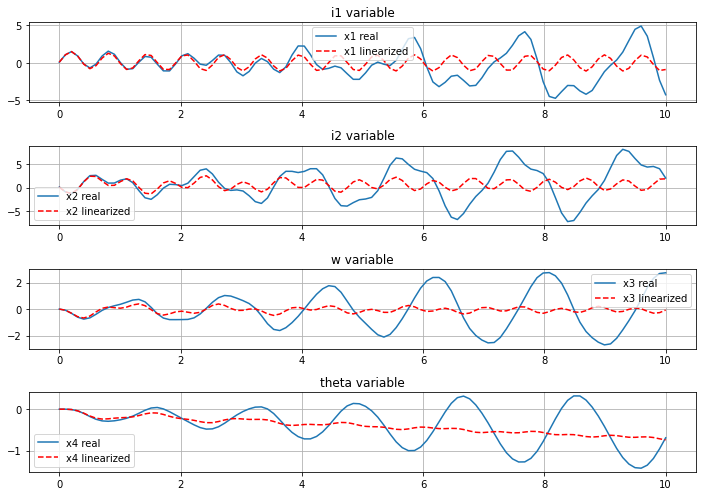

In [127]:
t = np.linspace(t0, t1, len(x_real[0]))

fig, ax = plt.subplots(4,1)
ax[0].set_title("i1 variable")
ax[0].plot(t, x_real[0], label='x1 real')
ax[0].plot(t, x_lin[0], 'r--', label='x1 linearized')
ax[0].grid()
ax[0].legend()

ax[1].set_title("i2 variable")
ax[1].plot(t, x_real[1], label='x2 real')
ax[1].plot(t, x_lin[1], 'r--', label='x2 linearized')
ax[1].grid()
ax[1].legend()

ax[2].set_title("w variable")
ax[2].plot(t, x_real[2], label='x3 real')
ax[2].plot(t, x_lin[2], 'r--', label='x3 linearized')
ax[2].grid()
ax[2].legend()

ax[3].set_title("theta variable")
ax[3].plot(t, x_real[3], label='x4 real')
ax[3].plot(t, x_lin[3], 'r--', label='x4 linearized')
ax[3].grid()
ax[3].legend()

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()


### Problem 1.17 
$$J \ddot{\theta}+F\dot{\theta}=T$$
$$\begin{bmatrix} \dot{\theta}\\ \dot{\omega} \end{bmatrix} = 
  \begin{bmatrix} 0&1\\0&-\frac{F}{J} \end{bmatrix} \begin{bmatrix} \theta\\\omega \end{bmatrix} + 
  \begin{bmatrix} 0\\\frac{1}{J} \end{bmatrix} T$$

In [107]:
t0 = 0 
t1 = 5 #s 
dt = 0.05 

J = 10 
F = 100 
T = 10

x0 = np.array([[0],[0]]) 


array([[0.1],
       [0.1],
       [0. ],
       [0. ]])

In [99]:
a-a

array([[0],
       [0],
       [0],
       [0]])